In [11]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

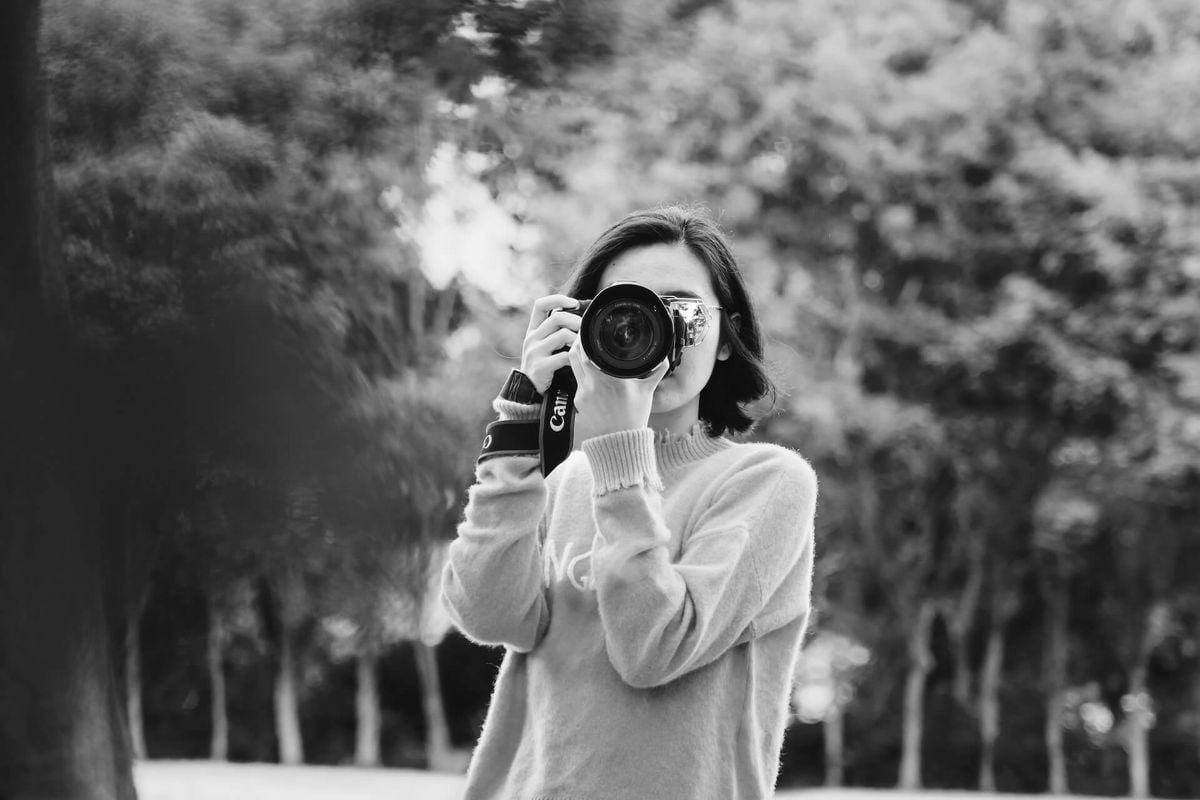

In [144]:
img1 = cv2.imread("/content/free.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2_imshow(img1)

In [107]:
len(img1)
#503,400

503

In [110]:
img1[200]

array([252, 173, 157, 155, 155, 155, 157, 158, 158, 158, 159, 159, 159,
       160, 160, 160, 159, 159, 159, 159, 159, 159, 159, 159, 159, 159,
       159, 158, 158, 158, 158, 157, 158, 158, 158, 158, 158, 158, 158,
       158, 158, 158, 158, 158, 158, 158, 158, 158, 159, 159, 159, 159,
       159, 159, 159, 159, 160, 160, 160, 160, 160, 160, 160, 160, 159,
       159, 160, 160, 160, 161, 161, 161, 162, 163, 163, 164, 164, 165,
       165, 166, 166, 166, 167, 168, 169, 170, 170, 171, 173, 174, 175,
       175, 177, 177, 178, 179, 180, 182, 184, 187, 187, 185, 180, 177,
       171, 172, 180, 176, 170, 158, 142, 150, 126,  88, 126, 193, 197,
       188, 200, 204, 214, 220, 227, 232, 234, 230, 216, 202, 190, 177,
       164, 150, 133, 126, 123, 117, 126, 132, 137, 136, 133, 133, 139,
       145, 159, 159, 157, 154, 150, 144, 138, 134, 125, 131, 137, 150,
       160, 154, 153, 169, 186, 157, 151, 154, 145, 156, 186, 201, 193,
       197, 193, 187, 188, 183, 179, 184, 169, 150, 151, 163, 15

In [62]:
img1[250:300][200:]

array([], shape=(0, 1200), dtype=uint8)

In [145]:
img1 = img1[200:]
max([i for i in img1[250]])

248

In [44]:
(img1[220:1500][:])

array([[ 32,  32,  32, ..., 153, 152, 151],
       [ 32,  32,  32, ..., 151, 150, 151],
       [ 32,  32,  32, ..., 149, 149, 150],
       ...,
       [ 22,  23,  24, ...,  48,  47,  47],
       [ 21,  22,  23, ...,  59,  58,  57],
       [ 21,  22,  23, ...,  79,  78,  77]], dtype=uint8)

# Segmenting Image

In [128]:
def region_growing(image, seed_point, threshold, region_mask):
    stack = [seed_point]
    while len(stack) > 0:
        x, y = stack.pop()
        if region_mask[x, y] == 0 and lower_threshold <= image[x, y] <= upper_threshold:
            region_mask[x, y] = 200
            if x > 0:
                stack.append((x - 1, y))
            if x < image.shape[0] - 1:
                stack.append((x + 1, y))
            if y > 0:
                stack.append((x, y - 1))
            if y < image.shape[1] - 1:
                stack.append((x, y + 1))


In [147]:
image = img1
lower_threshold = 130
upper_threshold = 220
binary_mask = np.zeros_like(image)
binary_mask[(image >= lower_threshold) & (image <= upper_threshold)] = 255

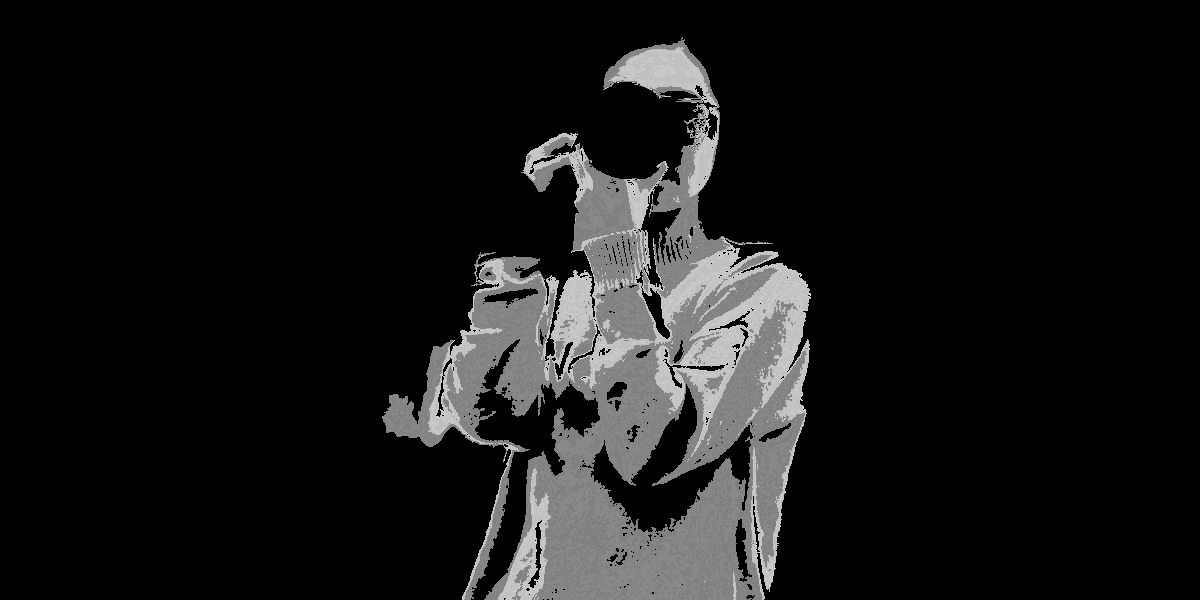

In [168]:
seed_points = [(20,800), (400, 600), (500,650),(20,500)]
# seed_points = [(200,200),(250,180)]

region_grown_mask = np.zeros_like(image)

for seed_point in seed_points:
    region_growing(image, seed_point, (lower_threshold, upper_threshold), region_grown_mask)

segmented_image = cv2.bitwise_and(img1, region_grown_mask)

cv2_imshow(segmented_image)